In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')
print(os.getcwd())

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


E:\projects\clients\PierceCounty\Models\BaseYear\Development\SoundCast


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tours per Person

In [4]:
df = load_data('tour_purpose_mode')
_df = df.groupby('source').sum()[['toexpfac']].T
_df.rename(index={'toexpfac':'Average Tours'}, inplace=True)

df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(index={'psexpfac':'Average Tours'}, inplace=True)

_df/_df_person

source,model,survey
Average Tours,1.58,1.68


## Pierce County

In [5]:
df = load_data('tour_purpose_mode')
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source']).sum()[['toexpfac']]
df = load_data('person_type')
_df_person = df.rename(columns={'person_county':'County'}).groupby(['County','source']).sum()[['psexpfac']]
_df.join(_df_person, how='left', on=['County','source']).\
    apply(lambda df: df.toexpfac/df.psexpfac, axis=1).\
    reset_index(name='ratio').pivot_table(index='County', columns='source', values='ratio')

source,model,survey
County,,
King,1.64,1.69
Kitsap,1.52,2.01
Pierce,1.49,1.57
Snohomish,1.55,1.66


# Percent of Tours by Purpose

source,model,survey
pdpurp,,
Escort,11.3%,9.2%
Meal,7.2%,6.2%
Personal Business,11.7%,13.4%
School,10.9%,10.6%
Shop,12.3%,11.6%
Social,19.9%,18.7%
Work,26.6%,30.3%


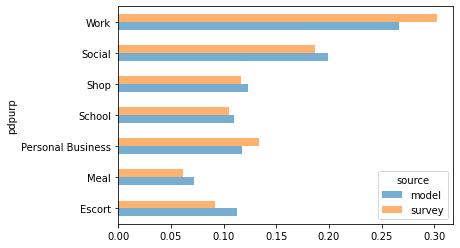

In [6]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = _df/_df_sum
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df.plot(kind='barh', alpha=0.6)
_df

## Pierce County

King
source County             pdpurp  model  survey
1        King             Escort   5.7%    4.1%
2        King               Meal   4.4%    3.3%
3        King  Personal Business   6.0%    8.3%
4        King             School   5.8%    5.7%
5        King               Shop   6.5%    6.2%
6        King             Social  10.9%    9.9%
7        King               Work  15.6%   16.4%
Kitsap
source  County             pdpurp  model  survey
9       Kitsap             Escort   0.8%    0.6%
10      Kitsap               Meal   0.4%    0.6%
11      Kitsap  Personal Business   0.8%    0.8%
12      Kitsap             School   0.6%    0.7%
13      Kitsap               Shop   0.9%    1.0%
14      Kitsap             Social   1.2%    1.5%
15      Kitsap               Work   1.5%    2.2%
Pierce
source  County             pdpurp  model  survey
16      Pierce             Escort   2.5%    2.3%
17      Pierce               Meal   1.2%    1.3%
18      Pierce  Personal Business   2.6%    2.3%
19      P

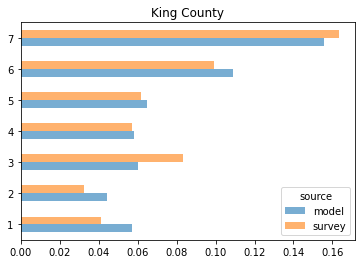

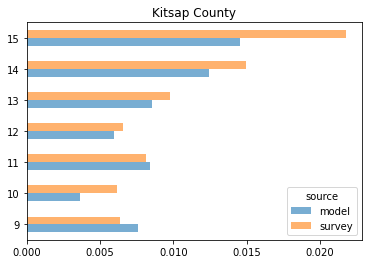

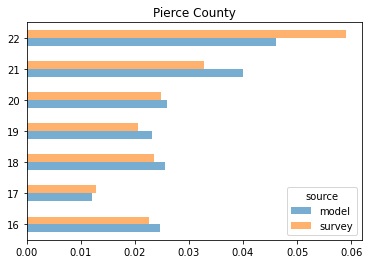

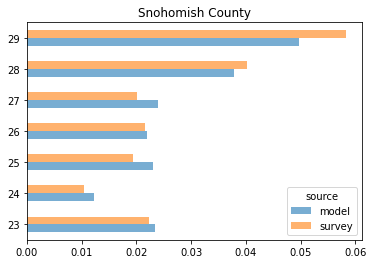

In [7]:
df = load_data('tour_purpose_mode').rename(columns={'person_county':'County'})
_df = df.pivot_table(index=['County','pdpurp'], columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = (_df/_df_sum).reset_index()
_df = _df.loc[_df.pdpurp!='Change Mode Inserted Purpose',:]
for county, _df_county in _df.groupby('County'): 
    print(county)
    print(_df_county)   
    _df_county.plot(kind='barh', alpha=0.6, title=county+' County')


# Tours per Person by Purpose

source,model,survey
pdpurp,,
Escort,0.18,0.16
Meal,0.11,0.10
Personal Business,0.19,0.23
School,0.17,0.18
Shop,0.19,0.20
Social,0.32,0.31
Work,0.42,0.51


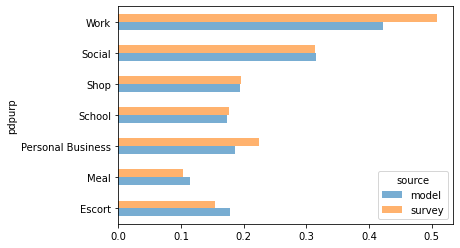

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
# Total population
df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(columns={'psexpfac': 'toexpfac'}, inplace=True)
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df = _df/_df_person.values
_df.plot(kind='barh', alpha=0.6)
_df

## Pierce County

King
source            County  model  survey
pdpurp                                 
Escort              King   0.17    0.13
Meal                King   0.13    0.10
Personal Business   King   0.18    0.26
School              King   0.17    0.18
Shop                King   0.19    0.19
Social              King   0.33    0.31
Work                King   0.47    0.52
Kitsap
source             County  model  survey
pdpurp                                  
Escort             Kitsap   0.19    0.17
Meal               Kitsap   0.09    0.17
Personal Business  Kitsap   0.21    0.22
School             Kitsap   0.15    0.18
Shop               Kitsap   0.21    0.27
Social             Kitsap   0.31    0.41
Work               Kitsap   0.36    0.59
Pierce
source             County  model  survey
pdpurp                                  
Escort             Pierce   0.18    0.18
Meal               Pierce   0.09    0.10
Personal Business  Pierce   0.19    0.19
School             Pierce   0.17    0.16
Shop  

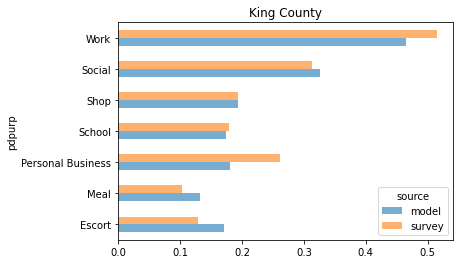

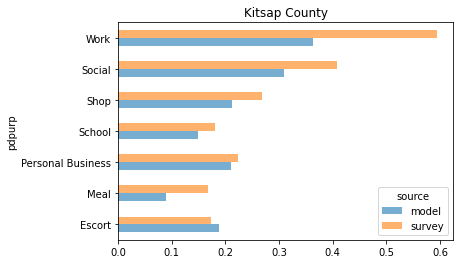

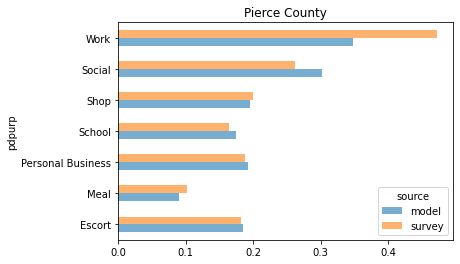

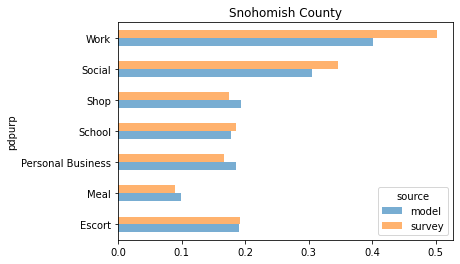

In [9]:
df = load_data('tour_purpose_mode').rename(columns={'person_county':'County'})
_df = df.groupby(['County', 'source', 'pdpurp'])['toexpfac'].sum().reset_index()
# Total population
df = load_data('person_type').rename(columns={'person_county':'County'})
_df_person = df.groupby(['County', 'source']).sum()[['psexpfac']]
_df = _df.loc[_df.pdpurp!='Change Mode Inserted Purpose',:]
_df = _df.join(_df_person, how='outer', on=['County','source'])
_df['tpp']= _df.apply(lambda df: df.toexpfac/df.psexpfac, axis=1)
_df = _df.pivot_table(index=['County', 'pdpurp'], columns='source', values='tpp').reset_index(level=0)
for county, _df_county in _df.groupby('County'): 
    print(county)
    print(_df_county)   
    _df_county.plot(kind='barh', alpha=0.6, title=county+' County')

# Tours by Person Type

source,model,survey
pptyp,,
Child Age 0-4,"267,897","363,125"
Child Age 5-15,"743,397","888,832"
Full-Time Worker,"2,723,514","2,943,230"
High School Student Age 16+,"213,859","180,589"
Non-Working Adult Age 65+,"683,410","945,913"
Non-Working Adult Age <65,"964,015","512,159"
Part-Time Worker,"539,965","464,305"
University Student,"280,953","205,832"


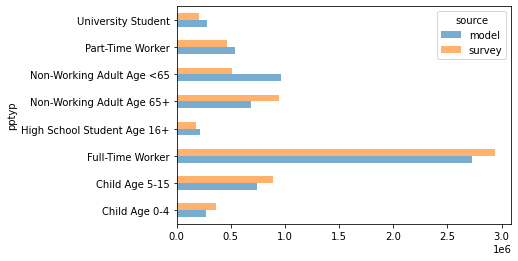

In [10]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')

df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

## Pierce County

King
source                      County     model    survey
pptyp                                                 
Child Age 0-4                 King   136,816   171,317
Child Age 5-15                King   375,411   465,027
Full-Time Worker              King 1,596,507 1,698,423
High School Student Age 16+   King   113,036    97,353
Non-Working Adult Age 65+     King   349,041   468,189
Non-Working Adult Age <65     King   481,223   271,873
Part-Time Worker              King   304,555   209,499
University Student            King   170,369   134,702
Kitsap
source                       County   model  survey
pptyp                                              
Child Age 0-4                Kitsap  14,565  51,143
Child Age 5-15               Kitsap  45,903  40,419
Full-Time Worker             Kitsap 143,990 196,263
High School Student Age 16+  Kitsap  12,341   7,038
Non-Working Adult Age 65+    Kitsap  57,606  94,354
Non-Working Adult Age <65    Kitsap  68,909  43,661
Part-Time Worker      

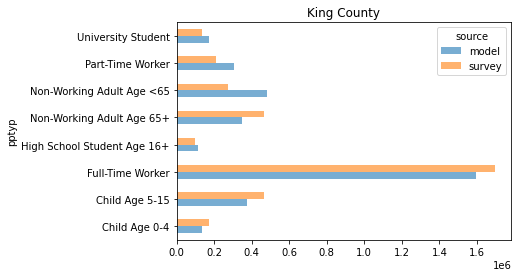

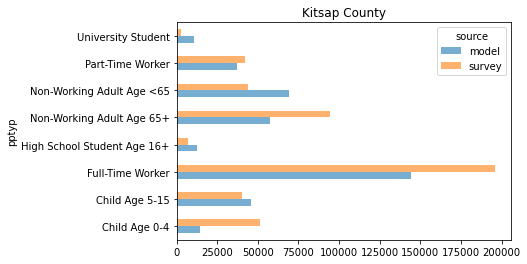

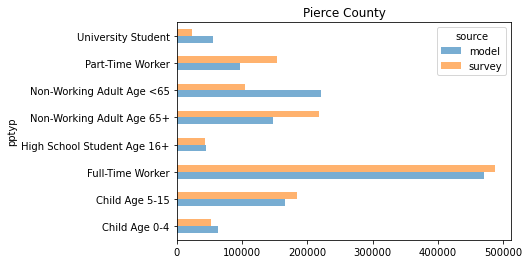

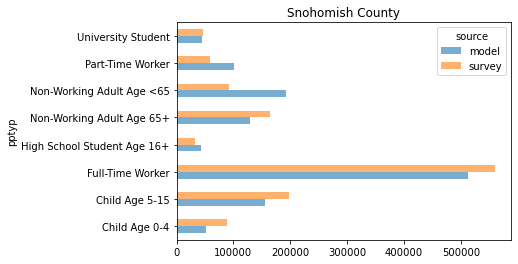

In [11]:
df = load_data('tour_purpose_mode').rename(columns={'person_county':'County'})

df = df.pivot_table(index=['County', 'pptyp'], columns='source', aggfunc='sum', values='toexpfac').reset_index(level=0)
for county, _df_county in df.groupby('County'): 
    print(county)
    print(_df_county)   
    _df_county.plot(kind='barh', alpha=0.6, title=county+' County')

## Work Tours by Person Type

source,model,survey
pptyp,,
Full-Time Worker,"1,456,884","1,719,034"
High School Student Age 16+,"8,677","3,826"
Part-Time Worker,"187,042","191,551"
University Student,"55,725","48,417"


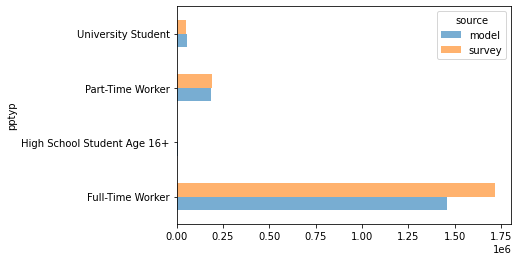

In [12]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

King
source                      County   model  survey
pptyp                                             
Full-Time Worker              King 852,135 956,178
High School Student Age 16+   King   4,566   1,012
Part-Time Worker              King 109,343  70,836
University Student            King  34,080  30,635
Kitsap
source                       County  model  survey
pptyp                                             
Full-Time Worker             Kitsap 78,141 114,640
High School Student Age 16+  Kitsap    587      53
Part-Time Worker             Kitsap 12,045  26,000
University Student           Kitsap  2,578   1,893
Pierce
source                       County   model  survey
pptyp                                              
Full-Time Worker             Pierce 251,685 306,311
High School Student Age 16+  Pierce   1,455     674
Part-Time Worker             Pierce  32,138  65,458
University Student           Pierce  10,720   6,540
Snohomish
source                          County   model 

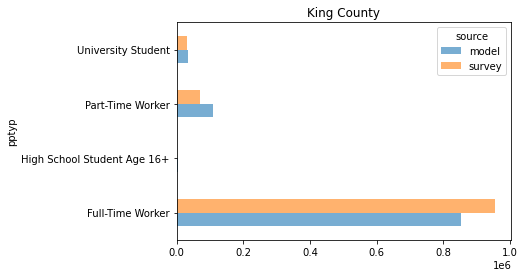

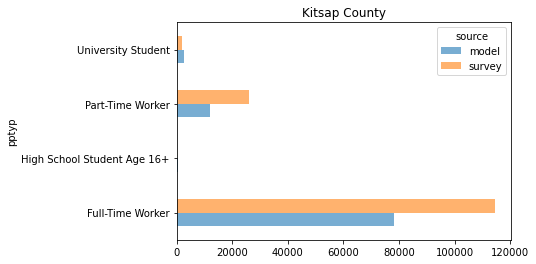

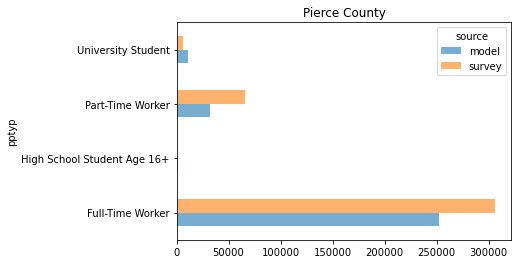

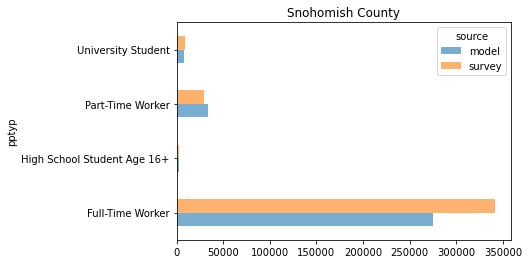

In [13]:
df = load_data('tour_purpose_mode').rename(columns={'person_county':'County'})
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index=['County', 'pptyp'], columns='source', aggfunc='sum', values='toexpfac').reset_index(level=0)
for county, _df_county in df.groupby('County'): 
    print(county)
    print(_df_county)   
    _df_county.plot(kind='barh', alpha=0.6, title=county+' County')